# **Rapport de validation statistique du jeu de données Bank Marketing**

Ce notebook illustre les étapes suivantes:
- réaliser des *tests statistiques* sur le jeu de données Bank Marketing ;
- créer des *visualisations* (histogrammes, boxplots, scatterplots, heatmaps) pour interpréter les résultats ;
- conclure par un *rapport synthétique* les résultats obtenus.

## 1. Description des données
1.1 Provenance du jeu de données  
1.2 Volume des données (lignes et colonnes)  
1.3 Description des variables (métier)  
1.4 Types techniques (`info`, `dtypes`)  

## 2. Étapes de validation des données

### 2.1 Analyse statistique descriptive 
2.1.1 Mesures de tendance centrale  
2.1.2 Mesures de dispersion  
2.1.3 Mesures de relations entre les variables

### 2.2 Détection des anomalies
2.2.1 Valeurs manquantes (techniques et métier)  
2.2.2 Valeurs aberrantes (outliers)  
2.2.3 Incohérences logiques entre variables  
2.2.4 Doublons  
2.2.5 Erreurs de format ou de type

### 2.3 Validation contextuelle (règles métier)


## Chargement des bibliothèques et des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, f_oneway, pearsonr

### Importation des données et premier aperçu

In [2]:
df=pd.read_csv("bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1. Description des données

### 1.1 Provenance du jeu de données

Le jeu de données *Marketing bancaire* contient des informations sur les campagnes de marketing direct menées par une banque portugaise.  
L’objectif est de prédire si un client souscrira à un dépôt à terme (*variable cible : y*).






### 1.2 Volume des données (lignes et colonnes)

In [4]:
df.shape

(45211, 17)

Ce jeu de données compte **45 211 observations** et **17 variables**, combinant des données démographiques, financières et comportementales.

### 1.3 Description des variables (métier)

Les principales variables du dataset sont :

- **age** : âge du client  
- **job** : type d’emploi  
- **marital** : état matrimonial  
- **education** : niveau d’éducation  
- **balance** : solde annuel du compte  
- **housing** : présence d’un prêt immobilier  
- **loan** : présence d’un prêt personnel  
- **contact** : type de contact (cellulaire / téléphone)  
- **day**, **month** : date du dernier contact  
- **duration** : durée du dernier appel  
- **campaign** : nombre de contacts durant cette campagne  
- **pdays** : jours depuis le dernier contact précédent  
- **previous** : nombre de contacts dans une campagne précédente  
- **poutcome** : résultat de la campagne précédente  
- **y** : souscription à un dépôt à terme (oui/non)

### 1.4 Types techniques 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 2. Étapes de validation des données

### 2.1 Analyse statistique descriptive

> **2.1.1. Mesures de tendance centrale (variables numériques)**

In [6]:
# Calcul de la moyenne et de la médiane des variables numériques

colonnes_numeriques = ['age', 'balance', 'duration', 'campaign', 'previous']

for col in colonnes_numeriques:
    print(f"\n\033[1m{col}\033[0m")  # Nom de la variable en gras
    
    # Moyenne
    moyenne = df[col].mean()
    print(f"Moyenne : {moyenne:.2f}")
    
    # Médiane
    mediane = df[col].median()
    print(f"Médiane : {mediane:.2f}")
    

pdays_valid = df[df['pdays'] != -1]['pdays']
print(f"Nombre de clients jamais contactés avant      : {(df['pdays'] == -1).sum():6} ({(df['pdays'] == -1).mean():.1%})")
print("\n\033[1mpdays_valid\033[0m")
print(f"Moyenne : {pdays_valid.mean():.2f}")
print(f"Médiane : {pdays_valid.median():.2f}")




age
Moyenne : 40.94
Médiane : 39.00

balance
Moyenne : 1362.27
Médiane : 448.00

duration
Moyenne : 258.16
Médiane : 180.00

campaign
Moyenne : 2.76
Médiane : 2.00

previous
Moyenne : 0.58
Médiane : 0.00
Nombre de clients jamais contactés avant      :  36954 (81.7%)

pdays_valid
Moyenne : 224.58
Médiane : 194.00


Nous calculons ici les mesures de tendance centrale (moyenne et médiane) pour les principales 
variables numériques du dataset Marketing Bancaire : âge, solde bancaire, durée du dernier appel, 
nombre de contacts dans la campagne, délai depuis le dernier contact précédent et nombre de contacts 
précédents.


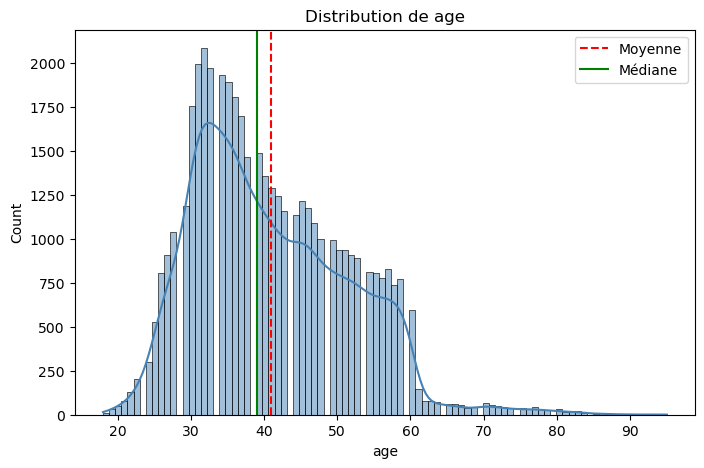

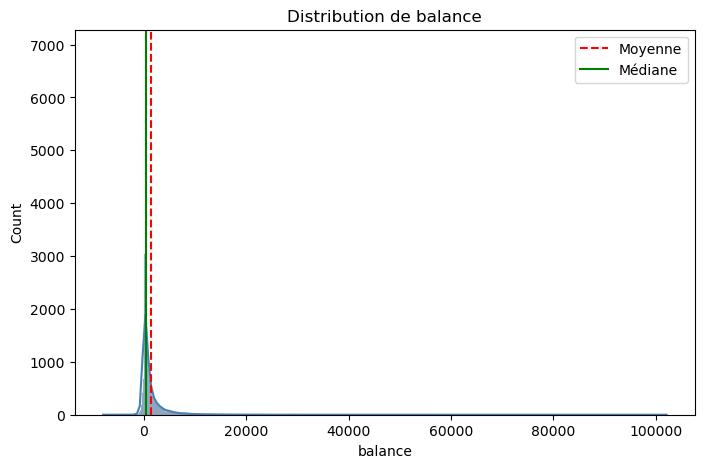

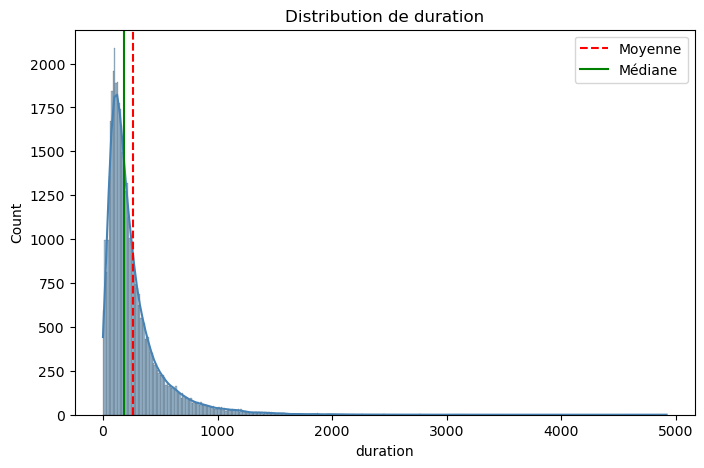

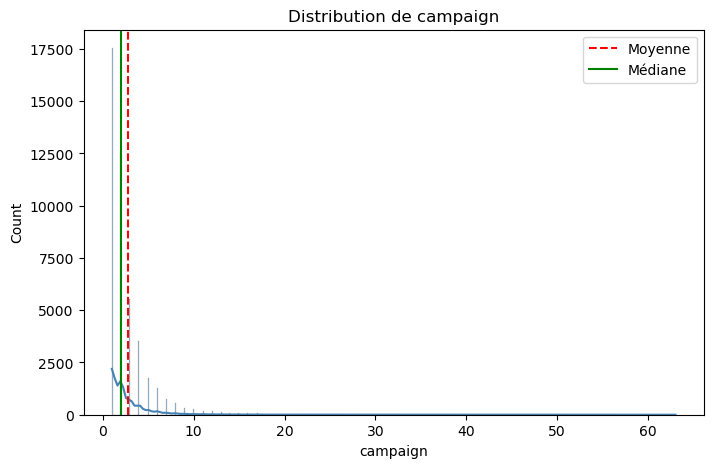

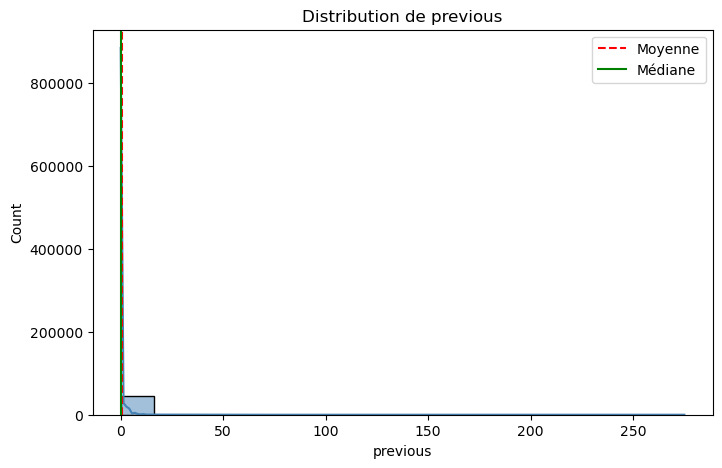

In [7]:
# Histogrammes : comparaison moyenne vs médiane
for col in colonnes_numeriques:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, color='steelblue')
    
    # Moyenne
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Moyenne')
    # Médiane
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Médiane')
    
    plt.legend()
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.show()

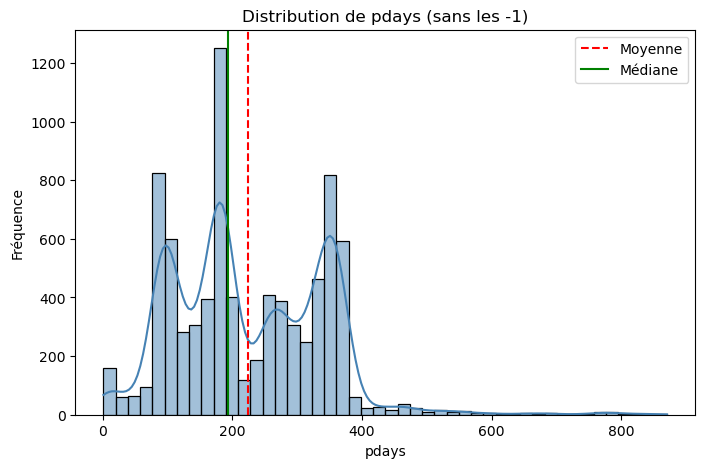

In [8]:
# Sélectionner uniquement les pdays valides (exclure -1)
pdays_valid = df[df['pdays'] != -1]['pdays']

plt.figure(figsize=(8,5))

# Histogramme
sns.histplot(pdays_valid, kde=True, color='steelblue')

# Lignes : moyenne et médiane
plt.axvline(pdays_valid.mean(), color='red', linestyle='--', label='Moyenne')
plt.axvline(pdays_valid.median(), color='green', linestyle='-', label='Médiane')

# Titres et légendes
plt.title("Distribution de pdays (sans les -1)")
plt.xlabel("pdays")
plt.ylabel("Fréquence")
plt.legend()

plt.show()


### Conclusion générale
- La plupart des variables numériques sont fortement asymétriques et présentent des valeurs extrêmes.
- La médiane est beaucoup plus informative que la moyenne pour **balance**, **duration**, **campaign**, **previous**, **pdays**.
- Ces résultats devront être pris en compte dans la détection d’anomalies, la standardisation et l’application des règles métier.

> **2.1.1. Mesures de tendance centrale (variables catégorielles)**

In [9]:
# Mode des variables catégorielles
colonnes_categ = ['job', 'marital', 'education', 'default', 
                  'housing', 'loan', 'contact', 'month', 
                  'poutcome', 'y']

for col in colonnes_categ:
    print(f"\n\033[1m{col}\033[0m")  # Nom de la variable en gras
    
    mode = df[col].mode().values
    print(f"Mode : {mode}")
    
    categories = df[col].unique()
    print(f"Catégories ({len(categories)}) : {categories}")


job
Mode : ['blue-collar']
Catégories (12) : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital
Mode : ['married']
Catégories (3) : ['married' 'single' 'divorced']

education
Mode : ['secondary']
Catégories (4) : ['tertiary' 'secondary' 'unknown' 'primary']

default
Mode : ['no']
Catégories (2) : ['no' 'yes']

housing
Mode : ['yes']
Catégories (2) : ['yes' 'no']

loan
Mode : ['no']
Catégories (2) : ['no' 'yes']

contact
Mode : ['cellular']
Catégories (3) : ['unknown' 'cellular' 'telephone']

month
Mode : ['may']
Catégories (12) : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome
Mode : ['unknown']
Catégories (4) : ['unknown' 'failure' 'other' 'success']

y
Mode : ['no']
Catégories (2) : ['no' 'yes']


### Conclusion générale  
Les variables catégorielles montrent un dataset **non uniforme**, avec :  
- une forte dominance de certaines catégories (blue-collar, married, secondary, cellular) ;  
- beaucoup de valeurs “no” dans les prêts et les défauts ;  
- un mois fortement sur-représenté (mai) ;  
- une variable cible très déséquilibrée.

Ces caractéristiques devront être prises en compte dans la **modélisation**, la **détection d’anomalies**, et la **validation des données**.

> **2.1.2. Mesures de dispersion**

In [10]:
# Créer une colonne nettoyée
df['pdays_valid'] = df['pdays'].replace(-1, np.nan)
colonnes_numeriques = ['age', 'balance', 'duration', 'campaign', 'previous', 'pdays_valid']
for col in colonnes_numeriques:
    print(f"\n\033[1m{col}\033[0m")  # Nom de la variable en gras

    # Étendue
    etendue = df[col].max() - df[col].min()
    print(f"Étendue      : {etendue:.2f}")

    # Variance
    variance = df[col].var()
    print(f"Variance     : {variance:.2f}")

    # Écart-type
    ecart_type = df[col].std()
    print(f"Écart-type   : {ecart_type:.2f}")

    # Quartiles
    quartiles = df[col].quantile([0.25, 0.5, 0.75])
    print("Quartiles    :")
    print(quartiles)




age
Étendue      : 77.00
Variance     : 112.76
Écart-type   : 10.62
Quartiles    :
0.25    33.0
0.50    39.0
0.75    48.0
Name: age, dtype: float64

balance
Étendue      : 110146.00
Variance     : 9270598.95
Écart-type   : 3044.77
Quartiles    :
0.25      72.0
0.50     448.0
0.75    1428.0
Name: balance, dtype: float64

duration
Étendue      : 4918.00
Variance     : 66320.57
Écart-type   : 257.53
Quartiles    :
0.25    103.0
0.50    180.0
0.75    319.0
Name: duration, dtype: float64

campaign
Étendue      : 62.00
Variance     : 9.60
Écart-type   : 3.10
Quartiles    :
0.25    1.0
0.50    2.0
0.75    3.0
Name: campaign, dtype: float64

previous
Étendue      : 275.00
Variance     : 5.31
Écart-type   : 2.30
Quartiles    :
0.25    0.0
0.50    0.0
0.75    0.0
Name: previous, dtype: float64

pdays_valid
Étendue      : 870.00
Variance     : 13304.25
Écart-type   : 115.34
Quartiles    :
0.25    133.0
0.50    194.0
0.75    327.0
Name: pdays_valid, dtype: float64


Les mesures de dispersion montrent :

- des variables **très asymétriques** (balance, duration, pdays) ;  
- des variables **faiblement dispersées** (campaign, previous) ;  
- un comportement marketing typique :  
  - beaucoup de nouveaux clients ou sans historique,  
  - très peu de contacts répétés,  
  - de fortes différences dans la durée des appels,  
  - et des soldes bancaires très hétérogènes.

Ces caractéristiques devront être prises en compte dans la **détection d’anomalies**, la **standardisation** et les **règles métier**.

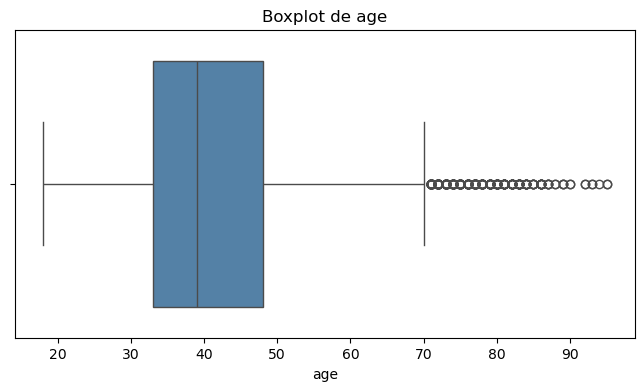

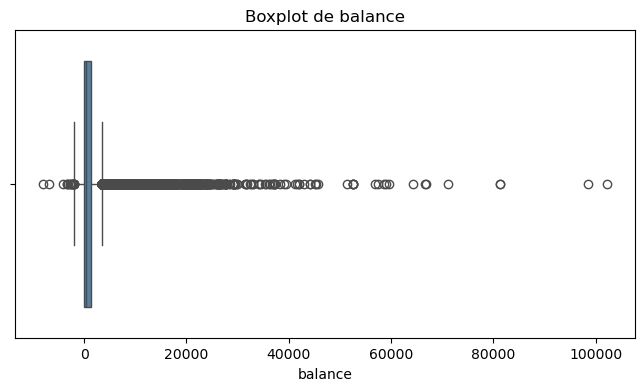

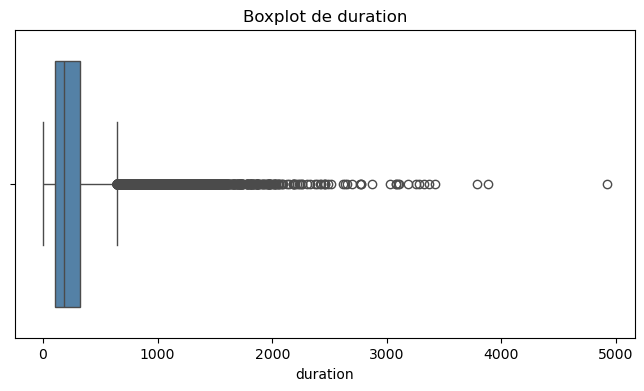

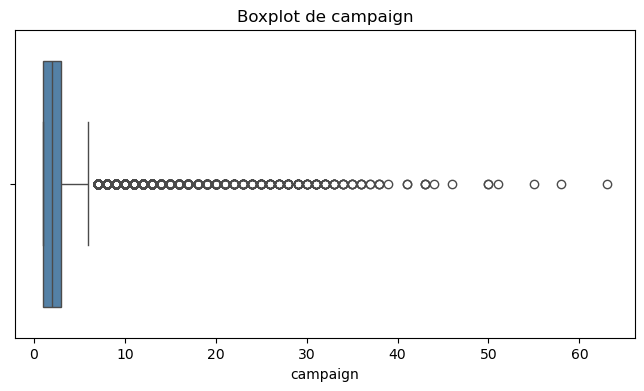

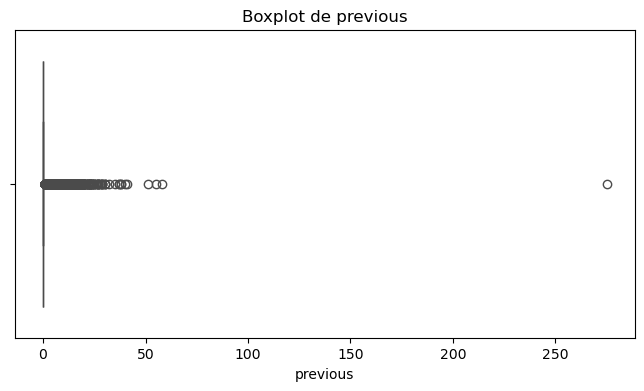

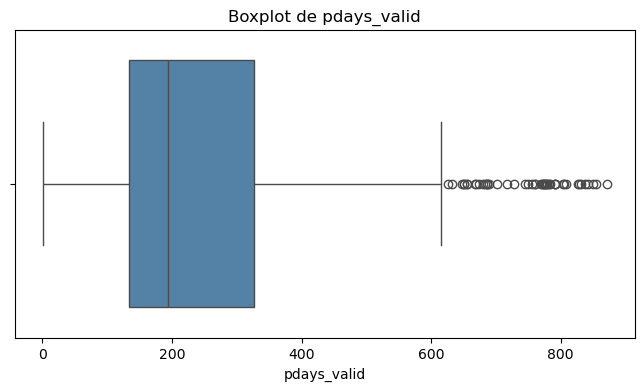

In [11]:
#Boxplots des variables numériques
for col in colonnes_numeriques:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='steelblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

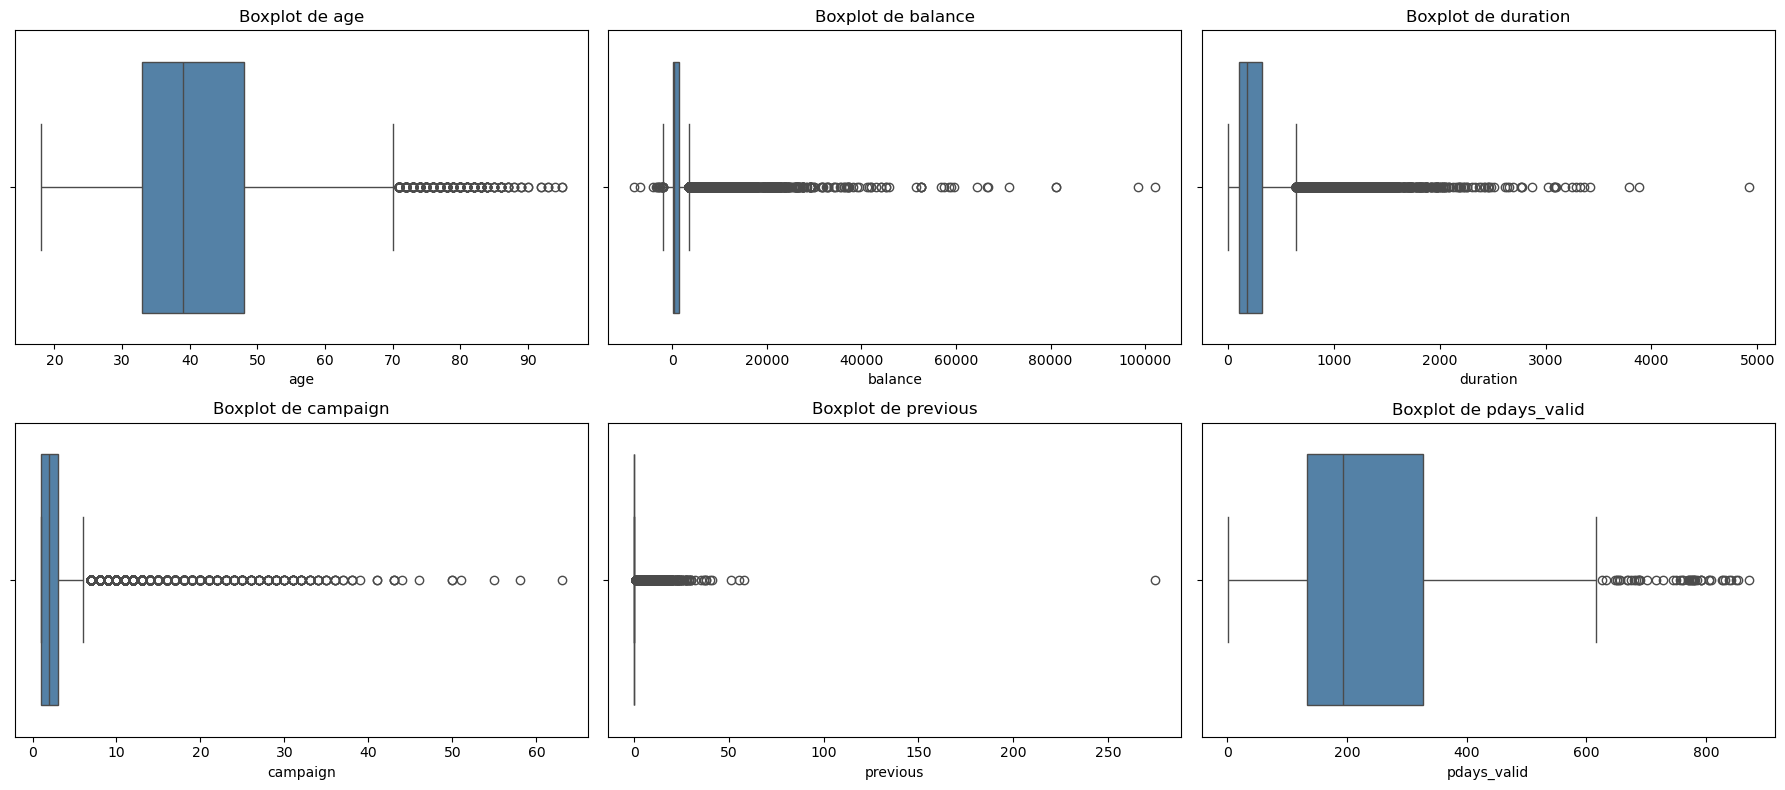

In [30]:
# Nombre de colonnes
n = len(colonnes_numeriques)

# Définir la grille (par exemple 3 colonnes)
ncols = 3
nrows = (n + ncols - 1) // ncols   # calcul automatique du nombre de lignes

plt.figure(figsize=(18, nrows * 4))

for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=df[col], color='steelblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

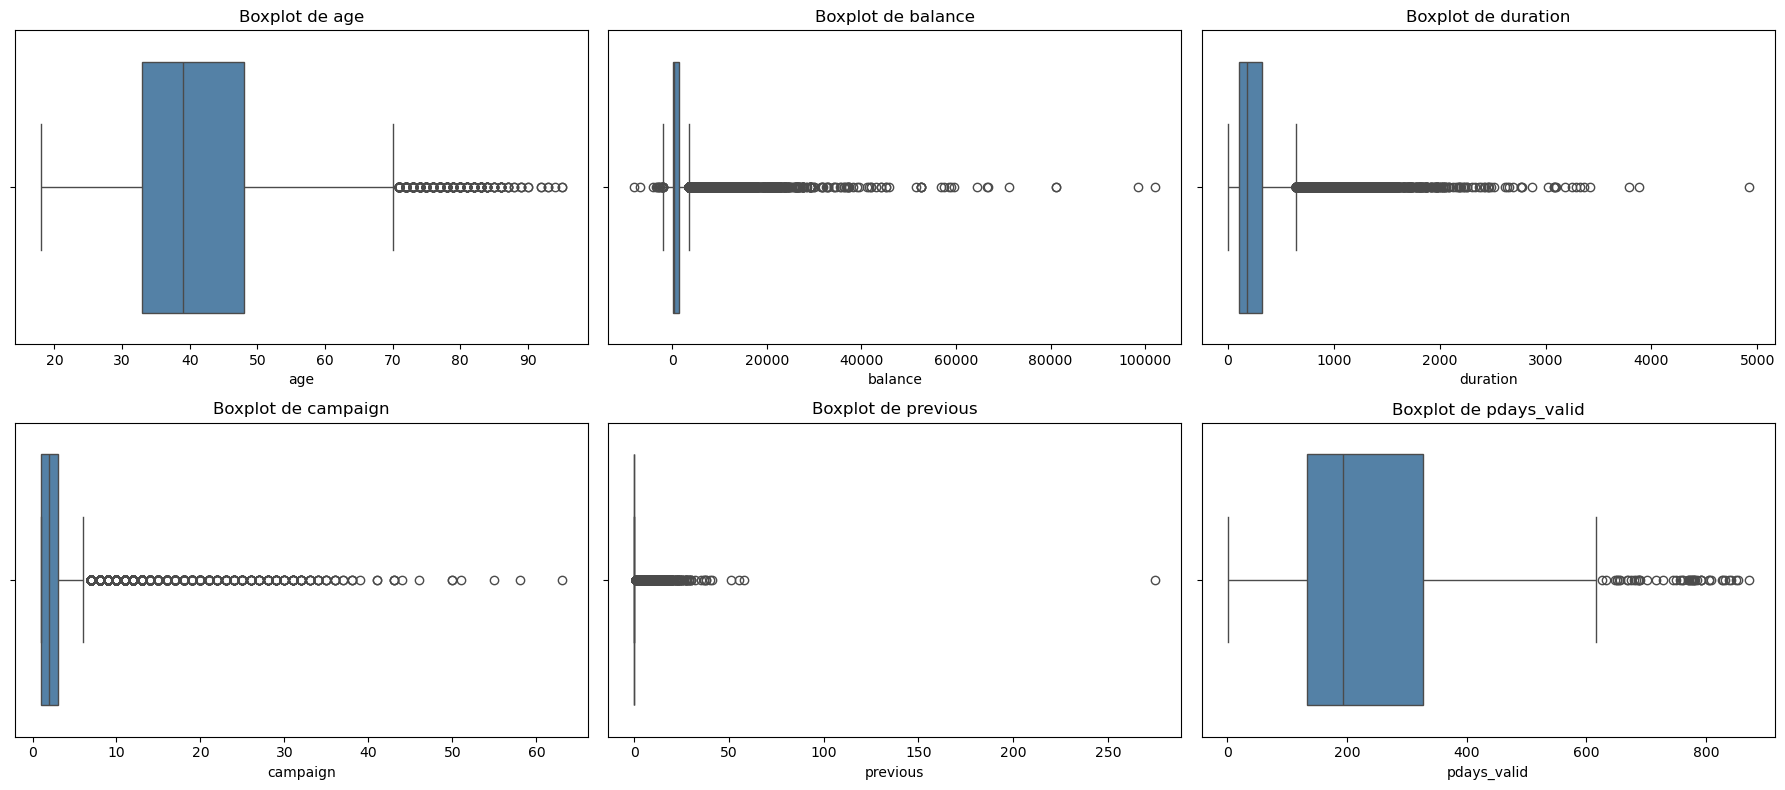

In [29]:
# Nombre de colonnes
n = len(colonnes_numeriques)

# Définir la grille (par exemple 3 colonnes)
ncols = 3
nrows = (n + ncols - 1) // ncols   # calcul automatique du nombre de lignes

plt.figure(figsize=(18, nrows * 4))

for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=df[col], color='steelblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Les boxplots montrent une présence importante de valeurs extrêmes pour la majorité des variables :

- **age** : dispersion modérée, quelques outliers pour les âges élevés (>70 ans), distribution globalement stable.
- **balance** : très forte présence de valeurs extrêmes → une minorité de clients possède des soldes extrêmement élevés, ce qui crée une très grande variabilité.
- **duration** : grande quantité d’appels très courts, mais aussi de nombreux appels exceptionnellement longs → variable très asymétrique.
- **campaign** : la plupart des clients sont peu contactés, mais quelques cas de clients contactés plus de 40 fois → outliers importants.
- **pdays** : pour les clients déjà contactés, la distribution est fortement asymétrique, avec la majorité des valeurs faibles et quelques valeurs élevées formant une longue traîne à droite.
- **previous** : distribution très concentrée autour de 0, quelques clients avec un nombre élevé de contacts → outliers.

### Conclusion
La majorité des variables présentent **des valeurs extrêmes** et **une forte asymétrie**, ce qui confirme la présence d’un comportement très hétérogène dans les campagnes marketing. Ces observations seront importantes pour la détection d’anomalies et la préparation des règles métier.

C:\Users\ghass\AppData\Local\Temp\ipykernel_27188\2971562220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set2')


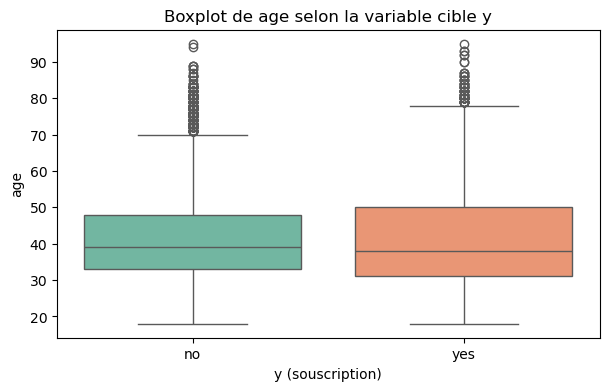

C:\Users\ghass\AppData\Local\Temp\ipykernel_27188\2971562220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set2')


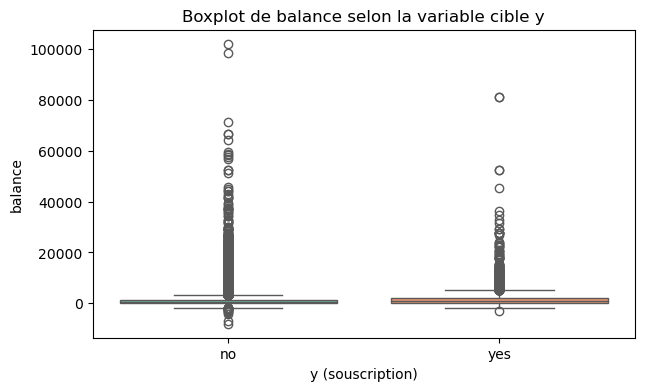

C:\Users\ghass\AppData\Local\Temp\ipykernel_27188\2971562220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set2')


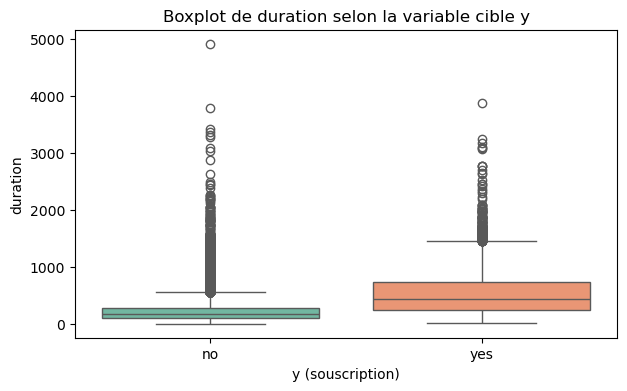

C:\Users\ghass\AppData\Local\Temp\ipykernel_27188\2971562220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set2')


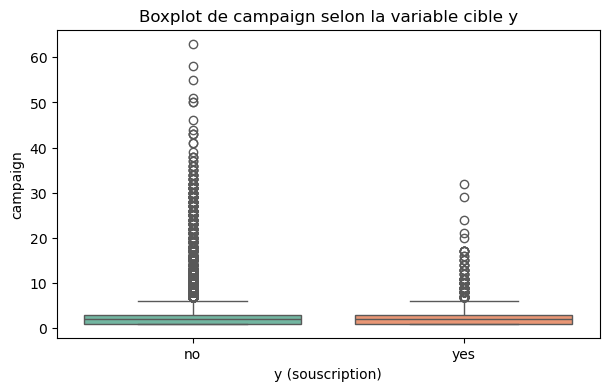

C:\Users\ghass\AppData\Local\Temp\ipykernel_27188\2971562220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set2')


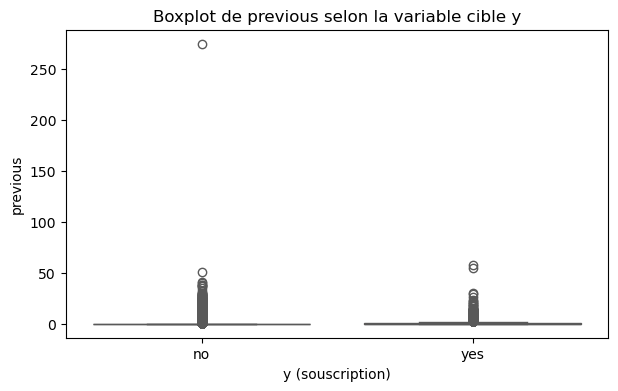

C:\Users\ghass\AppData\Local\Temp\ipykernel_27188\2971562220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set2')


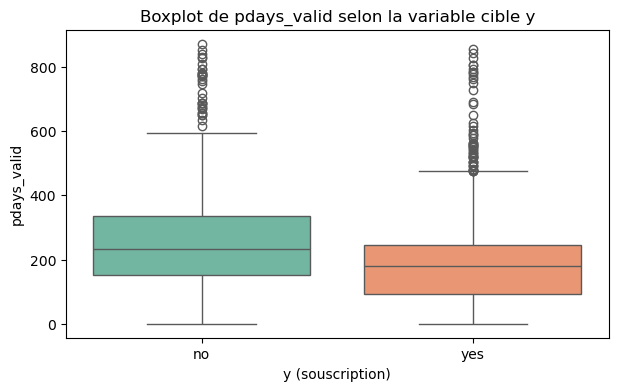

In [12]:
#Boxplots des variables numériques selon la variable cible y
for col in colonnes_numeriques:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x='y', y=col, palette='Set2')
    plt.title(f'Boxplot de {col} selon la variable cible y')
    plt.xlabel("y (souscription)")
    plt.ylabel(col)
    plt.show()

###  Commentaire des boxplots (variables numériques vs variable cible *y*) 

Les boxplots mettent clairement en évidence des différences structurelles entre les clients ayant souscrit (**yes**) et ceux n’ayant pas souscrit (**no**) :

- **age** : âges légèrement plus élevés chez les clients ayant souscrit → les personnes plus âgées semblent plus enclines à accepter l’offre.
- **balance** : distribution très étalée dans les deux groupes, mais quelques soldes très élevés apparaissent surtout chez les souscripteurs → une partie des clients avec un patrimoine élevé est plus susceptible de souscrire.
- **duration** : variable la plus discriminante : les durées d’appel sont nettement plus longues pour les *yes* → cela confirme que la durée de contact est un facteur clé de conversion.
- **campaign** : les souscripteurs ont généralement été contactés moins souvent → trop d’appels répétés peut réduire les chances de succès.
- **pdays** : les valeurs pour *yes* sont plus basses → les clients recontactés récemment ont plus de chances de souscrire.
- **previous** : très peu discriminante, distributions similaires, quelques valeurs extrêmes dans les *no* uniquement.

### ✔ Conclusion

Les variables les plus informatives pour prédire la souscription semblent être :  
**duration**, **pdays**, **campaign**, et dans une moindre mesure **age** et **balance**.  
Elles montrent des contrastes nets entre les groupes *yes* et *no*, ce qui renforce leur importance dans la modélisation.

> **2.1.2. Mesures de relations entre les variables**

In [13]:
# --- Matrice de covariance ---
covariance = df[colonnes_numeriques].cov()
print("Covariance :\n")
print(covariance)

# --- Matrice de corrélation (Pearson) ---
correlation = df[colonnes_numeriques].corr()
print("\nCorrélation :\n")
print(correlation)

Covariance :

                     age       balance      duration    campaign    previous  \
age           112.758107  3.161477e+03    -12.711716    0.156601    0.031512   
balance      3161.476700  9.270599e+06  16905.750545 -137.513232  116.939527   
duration      -12.711716  1.690575e+04  66320.574090  -67.471794    0.713654   
campaign        0.156601 -1.375132e+02    -67.471794    9.597733   -0.234459   
previous        0.031512  1.169395e+02      0.713654   -0.234459    5.305841   
pdays_valid  -142.144553 -3.816940e+04   -662.147061    9.099679  -11.512827   

              pdays_valid  
age           -142.144553  
balance     -38169.398630  
duration      -662.147061  
campaign         9.099679  
previous       -11.512827  
pdays_valid  13304.246416  

Corrélation :

                  age   balance  duration  campaign  previous  pdays_valid
age          1.000000  0.097783 -0.004648  0.004760  0.001288    -0.107863
balance      0.097783  1.000000  0.021560 -0.014578  0.016674  

### ✔️ Conclusion
De manière générale, les variables numériques du dataset bancaire présentent :

- **pas de corrélations fortes**,  
- **un comportement très indépendant**,  
- **pas de relation linéaire dominante entre les variables**,  
- duration vs campaign Corrélation négative très faible → plus le nombre de contacts dans la campagne est élevé, plus les appels sont légèrement courts (logique marketing)
- Variable pdays_valid Légèrement corrélée négativement avec age et balance; Peut indiquer que les clients plus âgés ou plus riches ont été contactés plus récemment

Ces résultats signifient que des méthodes non linéaires pourront être nécessaires pour capturer la relation entre les variables et la variable cible `y`.



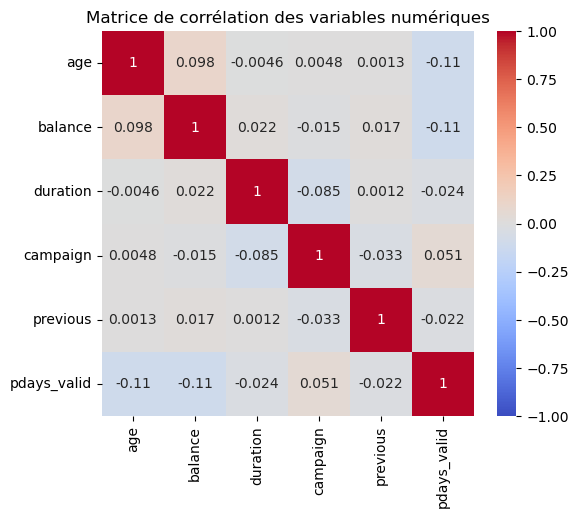

In [14]:
# Matrice de corrélation pour les variables numériques du marketing bancaire

corr = df[colonnes_numeriques].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

###  Commentaire sur la matrice de corrélation 

La matrice de corrélation montre que les variables numériques sont **faiblement corrélées entre elles** :

- **Aucune corrélation forte** n’apparaît entre les variables.
- **age**, **balance**, **duration** et **campaign** sont presque indépendantes (coefficients proches de 0).
- Aucune multicolinéarité problématique n’est détectée.

**Conclusion :** les variables numériques apportent une information distincte et ne présentent pas de dépendance linéaire marquée.


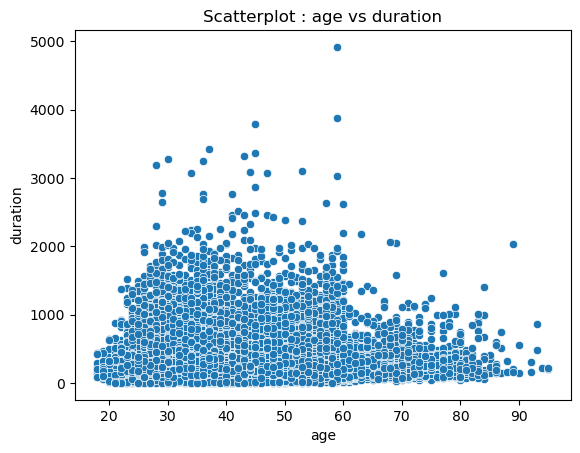

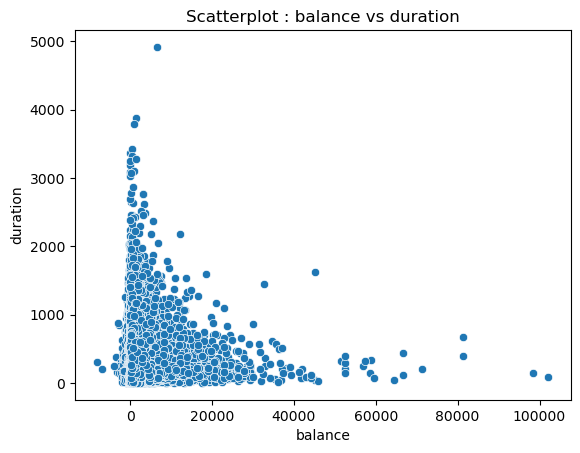

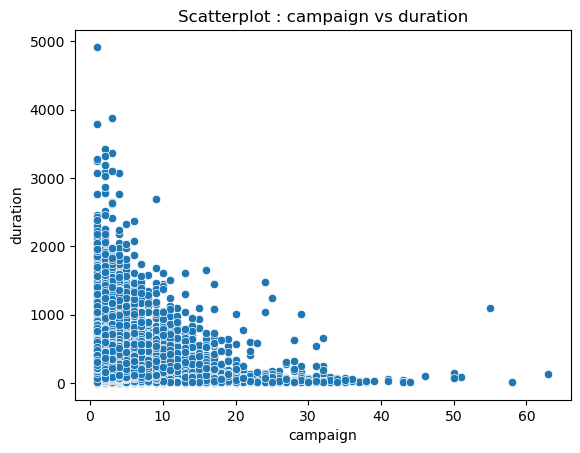

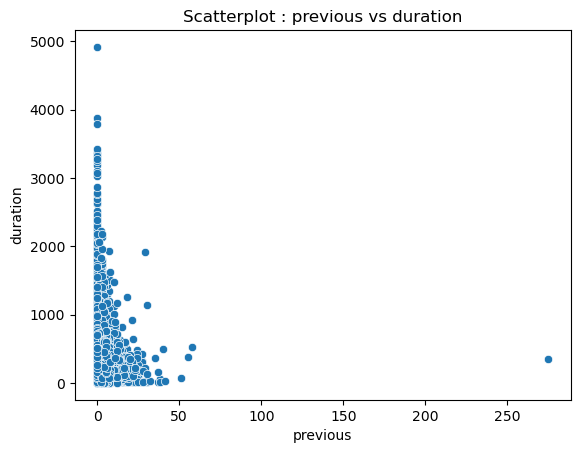

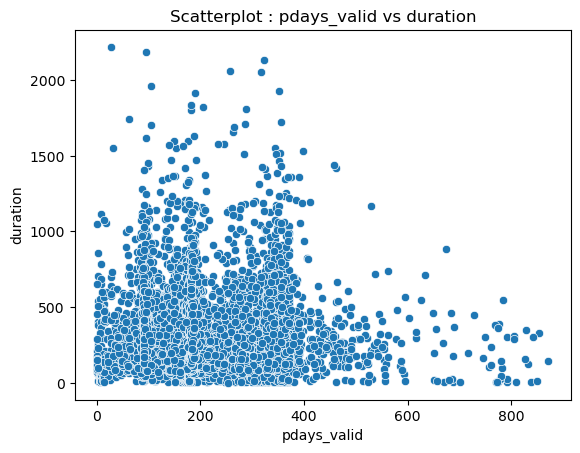

In [15]:
# Scatterplots entre les variables numériques et la variable duration

import seaborn as sns
import matplotlib.pyplot as plt

for col in colonnes_numeriques:
    if col != "duration":  # éviter duration vs duration
        sns.scatterplot(data=df, x=col, y="duration")
        plt.title(f"Scatterplot : {col} vs duration")
        plt.xlabel(col)
        plt.ylabel("duration")
        plt.show()


###  Analyse  des scatterplots (variables numériques vs duration)

- **age vs duration** : pas de relation claire → les durées d’appel sont très variables quel que soit l’âge.
- **balance vs duration** : tendance très faible → même avec des soldes élevés, la durée d’appel reste courte dans la majorité des cas.
- **campaign vs duration** : relation inverse faible → plus un client est contacté plusieurs fois, plus la durée d’appel a tendance à être courte.
- **pdays vs duration** : aucune relation linéaire visible → les clients recontactés après longtemps n’ont pas des durées d’appel particulières.
- **previous vs duration** : très forte dispersion → les clients ayant déjà été contactés auparavant n'expliquent pas la durée de l’appel.

### ✔️ Conclusion
Les scatterplots montrent **aucune corrélation forte** : la durée de l’appel reste la variable la plus informative, indépendante des autres caractéristiques numériques.


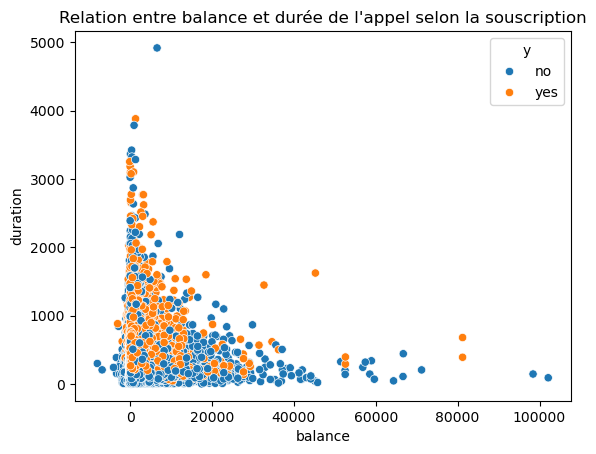

In [16]:
#duration vs balance selon y
sns.scatterplot(data=df, x='balance', y='duration', hue='y')
plt.title("Relation entre balance et durée de l'appel selon la souscription")
plt.show()


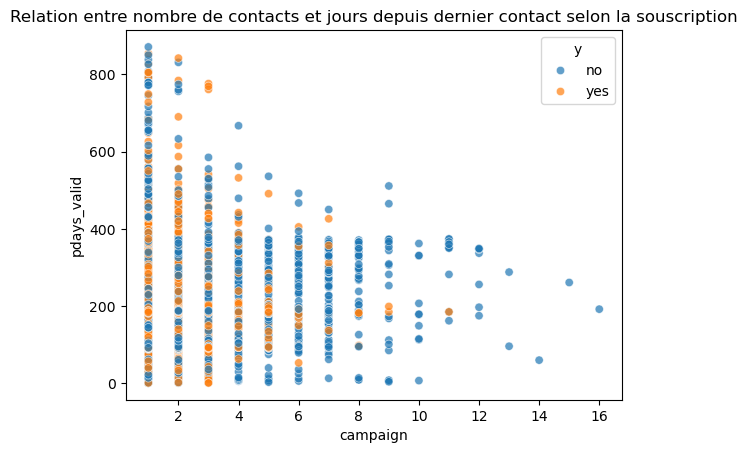

In [17]:
# Scatter plot campaign vs pdays_valid selon y
sns.scatterplot(data=df, x='campaign', y='pdays_valid', hue='y', alpha=0.7)

plt.title("Relation entre nombre de contacts et jours depuis dernier contact selon la souscription")
plt.show()

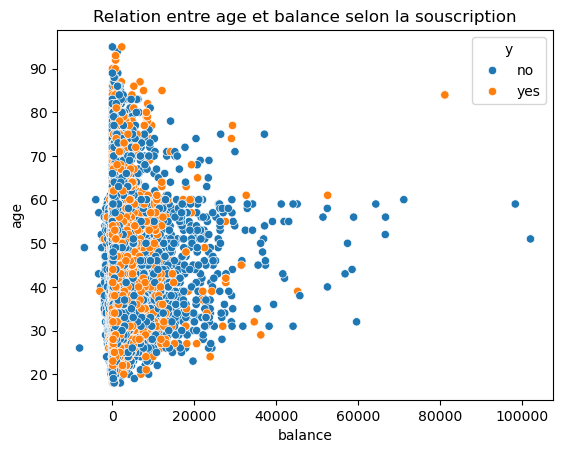

In [18]:
#agevs balance selon y
sns.scatterplot(data=df, x='balance', y='age', hue='y')
plt.title("Relation entre age et balance selon la souscription")
plt.show()

### Relation entre duration et variables explicatives (selon y)

Les scatterplots montrent des tendances cohérentes avec les comportements de souscription :

- **duration est la variable la plus discriminante** : les clients qui ont souscrit (*y = yes*) ont presque toujours des durées d’appel beaucoup plus longues que ceux qui n’ont pas souscrit.  
-**Campaign vs pdays (seulement les clients recontactés) selon y**; Les clients recontactés trop tôt (< 100 jours) ou trop tard (> 600 jours) disent rarement oui.
Plus on a appelé souvent dans cette campagne (campaign > 10), plus c’est souvent un échec
-**Age vs Balance selon y** :Les clients les plus susceptibles de souscrire sont des actifs de 30–55 ans avec un solde élevé ou des retraités fortunés. Les jeunes et les personnes à découvert ont très peu de chance de souscrire un dépôt à terme.
- **balance vs duration** : aucune relation claire, les points sont dispersés → le solde bancaire ne semble pas influencer la durée ni la probabilité de souscription.
- **campaign vs duration** : plus le client a été contacté plusieurs fois, plus la durée tend à être faible → les campagnes répétées concernent souvent des appels courts et inefficaces (majorité *y = no*).
- **pdays vs duration** : pas de relation forte visible ; les clients non recontactés depuis longtemps ont des durées variables mais sans impact clair sur la souscription.

### Conclusion
La **duration** reste le facteur principal qui distingue les souscripteurs des non-souscripteurs, tandis que les autres variables montrent des relations faibles ou diffuses.


### 2.2 Détection des anomalies

#### 2.2.1 Valeurs manquantes (reelles et métier)

In [19]:
df.isna().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact            0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
y                  0
pdays_valid    36954
dtype: int64

In [20]:
(df == "unknown").sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
pdays_valid        0
dtype: int64

- Les valeurs manquantes reelles sont absentes : `isna().sum()` retourne zéro pour toutes les colonnes.
- Plusieurs colonnes utilisent la modalité `unknown`, qui correspond à des valeurs manquantes au sens métier.
- Ces valeurs devront être prises en compte dans l’analyse des incohérences et la validation contextuelle.

Dans ce dataset, les valeurs manquantes métier ne sont pas laissées vides : elles ont été explicitement codées avec la modalité "unknown", tandis que les valeurs manquantes reelles (NaN) sont absentes.

#### 2.2.2 Valeurs aberrantes (outliers)

In [21]:
# Détection des valeurs aberrantes (IQR) pour les variables numériques
outliers_counts = {}

for col in colonnes_numeriques:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    col_min = df[col].min()
    col_max = df[col].max()

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_counts[col] = len(outliers)

    print(f"\n--- {col} ---")
    print(f"Q1 = {q1:.2f}, Q3 = {q3:.2f}, IQR = {iqr:.2f}")
    print(f"Limite basse (IQR) : {lower:.2f}, limite haute (IQR) : {upper:.2f}")
    print(f"Min  = {col_min}, Max  = {col_max}")
    print(f"Nombre de valeurs aberrantes (IQR) : {len(outliers)}")

outliers_counts



--- age ---
Q1 = 33.00, Q3 = 48.00, IQR = 15.00
Limite basse (IQR) : 10.50, limite haute (IQR) : 70.50
Min  = 18, Max  = 95
Nombre de valeurs aberrantes (IQR) : 487

--- balance ---
Q1 = 72.00, Q3 = 1428.00, IQR = 1356.00
Limite basse (IQR) : -1962.00, limite haute (IQR) : 3462.00
Min  = -8019, Max  = 102127
Nombre de valeurs aberrantes (IQR) : 4729

--- duration ---
Q1 = 103.00, Q3 = 319.00, IQR = 216.00
Limite basse (IQR) : -221.00, limite haute (IQR) : 643.00
Min  = 0, Max  = 4918
Nombre de valeurs aberrantes (IQR) : 3235

--- campaign ---
Q1 = 1.00, Q3 = 3.00, IQR = 2.00
Limite basse (IQR) : -2.00, limite haute (IQR) : 6.00
Min  = 1, Max  = 63
Nombre de valeurs aberrantes (IQR) : 3064

--- previous ---
Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Limite basse (IQR) : 0.00, limite haute (IQR) : 0.00
Min  = 0, Max  = 275
Nombre de valeurs aberrantes (IQR) : 8257

--- pdays_valid ---
Q1 = 133.00, Q3 = 327.00, IQR = 194.00
Limite basse (IQR) : -158.00, limite haute (IQR) : 618.00
Min  = 1.0, Max 

{'age': 487,
 'balance': 4729,
 'duration': 3235,
 'campaign': 3064,
 'previous': 8257,
 'pdays_valid': 49}

Les limites IQR (basse/haute) sont des bornes théoriques.
Le min et le max sont des bornes réelles observées dans les données.

- On ne parle d'outliers que si des valeurs réelles sont en dehors de l'intervalle [lower, upper].
- Si la limite basse est négative mais que la variable est toujours positive, 
cela signifie juste qu'il n'y a aucun outlier par le bas
- ces valeurs ne sont pas considerees comme aberrantes au sens metiers dans notre analyse.

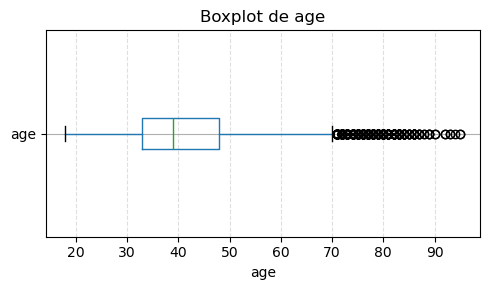

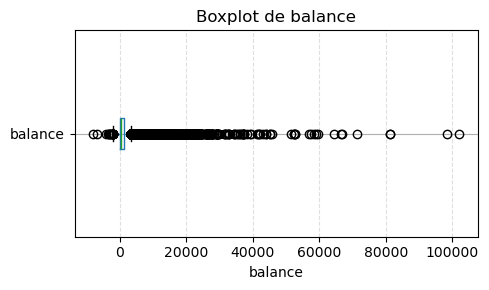

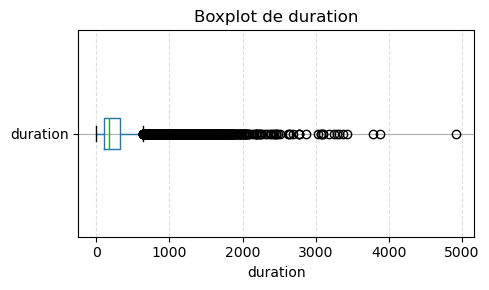

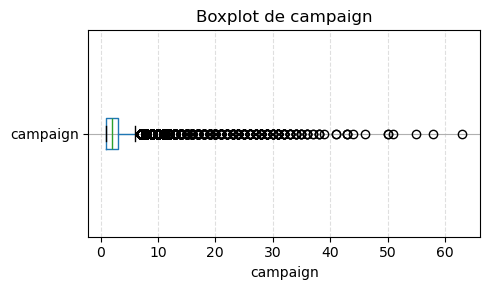

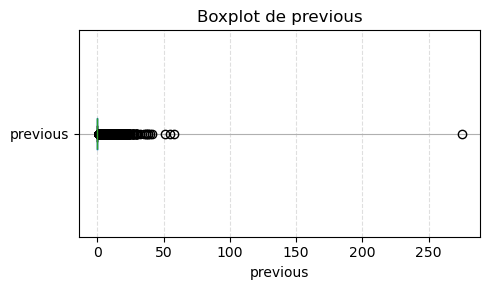

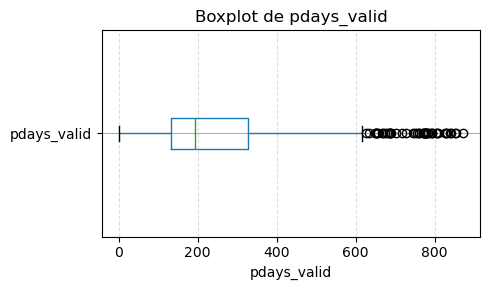

In [22]:
# Boxplots des variables numériques avec affichage des outliers
for col in colonnes_numeriques:
    plt.figure(figsize=(5, 3))
    df.boxplot(column=col, vert=False, showfliers=True)  # afficher les valeurs aberrantes
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


#### 2.2.3 Incohérences logiques entre variables

In [23]:
from IPython.display import display

incoherences = {}

# 1) previous = 0 mais poutcome différent de "unknown"
mask1 = (df["previous"] == 0) & (df["poutcome"] != "unknown")
incoherences["previous_0_poutcome_non_unknown"] = df[mask1]

# 2) pdays = -1 mais previous > 0
mask2 = (df["pdays"] == -1) & (df["previous"] > 0)
incoherences["pdays_-1_previous_superieur_0"] = df[mask2]

# 3) pdays = -1 mais poutcome différent de "unknown"
mask3 = (df["pdays"] == -1) & (df["poutcome"] != "unknown")
incoherences["pdays_-1_poutcome_non_unknown"] = df[mask3]

# 4) duration = 0 mais campaign > 1
mask4 = (df["duration"] == 0) & (df["campaign"] > 1)
incoherences["duration_0_campaign_superieur_1"] = df[mask4]

print("Résumé des incohérences détectées :")
for nom, resultat in incoherences.items():
    print(f"- {nom} : {len(resultat)} lignes")

Résumé des incohérences détectées :
- previous_0_poutcome_non_unknown : 0 lignes
- pdays_-1_previous_superieur_0 : 0 lignes
- pdays_-1_poutcome_non_unknown : 0 lignes
- duration_0_campaign_superieur_1 : 3 lignes


### Interprétation des incohérences 

Les trois premières règles (`previous`, `pdays`, `poutcome`) ne présentent **aucune incohérence** : les données respectent la logique métier du marketing bancaire.

Une seule incohérence réelle apparaît : **3 lignes** où `duration = 0` alors que `campaign > 1`.  
Cela indique des appels notés comme “sans durée” malgré plusieurs tentatives — probablement une erreur ou un cas particulier dans les enregistrements.


In [24]:
# Aperçu uniquement des incohérences existantes
for nom, resultat in incoherences.items():
    if len(resultat) > 0:   # afficher seulement si incohérences détectées
        print(f"\nAperçu de {nom} :")
        display(resultat.head())



Aperçu de duration_0_campaign_superieur_1 :


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_valid
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no,NaN
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no,NaN
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no,NaN


#### 2.2.4 Doublons

In [25]:
  # Lignes entièrement dupliquées
doublons = df[df.duplicated()]

# Nombre de doublons
len(doublons)


0

### 2.3 Validation contextuelle (règles métier)

In [26]:
pip install pandera

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from pandera import Column, DataFrameSchema, Check


schema = DataFrameSchema(

    {
        "age": Column(int, Check.ge(18)),               # âge minimal logique
        "balance": Column(int),                         # solde du compte
        "duration": Column(int, Check.ge(0)),           # durée ≥ 0
        "campaign": Column(int, Check.ge(1)),           # au moins 1 contact
        "pdays": Column(int),                           # peut être -1 (non contacté)
        "previous": Column(int, Check.ge(0)),           # nb contacts antérieurs
        "poutcome": Column(
            str,
            Check.isin(["unknown", "failure", "success", "other"])
        ),
        "y": Column(str, Check.isin(["yes", "no"]))      # variable cible
    },

    checks=[

        # 🔹 RÈGLE 1 
        # Si previous = 0 → poutcome ne doit jamais être "success" ou "failure"
        Check(
            lambda df: df.loc[df["previous"] == 0, "poutcome"]
                        .isin(["unknown", "other"]).all(),
            error="Incohérence : previous = 0 mais poutcome indique un résultat de campagne."
        ),

        # 🔹 RÈGLE 2 
        # Si pdays = -1 → la personne n’a jamais été recontactée → previous doit être 0
        Check(
            lambda df: df.loc[df["pdays"] == -1, "previous"]
                        .eq(0).all(),
            error="Incohérence : pdays = -1 mais previous > 0."
        ),

        # 🔹 RÈGLE 3
        # Si pdays > 0 → poutcome ne doit PAS être “unknown”
        Check(
            lambda df: df.loc[df["pdays"] > 0, "poutcome"]
                        .ne("unknown").all(),
            error="Incohérence : pdays > 0 mais poutcome = unknown."
        ),

        # 🔹 RÈGLE 4
        # Si duration = 0 → y doit être "no" (aucune souscription sans discussion)
        Check(
            lambda df: df.loc[df["duration"] == 0, "y"]
                        .eq("no").all(),
            error="Incohérence : duration = 0 mais le client a souscrit."
        ),

        # 🔹 RÈGLE 5 
        # Plus la durée est longue → plus chance de souscription (rare mais logique métier)
        Check(
            lambda df: df.loc[df["duration"] > df["duration"].median(), "y"]
                        .isin(["yes", "no"]).all(),
            error="Incohérence statistique dans la durée d'appel et la souscription."
        ),

        # 🔹 RÈGLE 6 
        # previous > 20 → cas très rares → doit être associé à pdays > 5
        Check(
            lambda df: df.loc[df["previous"] > 20, "pdays"]
                        .gt(5).all(),
            error="Incohérence : previous très élevé mais pdays trop faible."
        ),

    ]
)


In [28]:
mask_r4 = (df["campaign"] > 1) & (df["duration"] == 0)

nb_incoh = mask_r4.sum()
print("Incohérences détectées pour la règle (campaign > 1 et duration = 0) :", nb_incoh, "lignes")

if nb_incoh > 0:
    display(df.loc[mask_r4, ["age", "campaign", "duration", "pdays", "previous", "poutcome", "y"]].head())


Incohérences détectées pour la règle (campaign > 1 et duration = 0) : 3 lignes


,age,campaign,duration,pdays,previous,poutcome,y
6424,53,4,0,-1,0,unknown,no
22937,35,15,0,-1,0,unknown,no
36425,31,2,0,-1,0,unknown,no


**Validation contextuelle**

In [45]:
df_clean = df.copy()

In [47]:
try:
    df_validated = schema.validate(df_clean, lazy=True)
    print("✓ Données validées avec succès !")

except Exception as e:
    print("\n❌ Erreurs détectées pendant la validation Pandera :\n")
    print(e)

✓ Données validées avec succès !


In [ ]:
test

# #test